## 1. Precipitation Accumulation and Area Weighting 
## 2. Sine Curve Std Error Calcuations
## 3. MCW Weighted Stream Samples

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors
from matplotlib import patheffects

In [2]:
import read_mcw
df = read_mcw.read_and_process()
df.drop(df[df['Type'] == 'MC'].index, inplace = True)
df.drop(df[df['Type'] == 'BC'].index, inplace = True)
df.head(3)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,D_18O_Snow,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.232,RC,1.0,-12.540525,NaN,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701
5,6,RC_02,2022-10-27,-95.549245,0.928,-13.497653,0.164,RC,2.0,-13.497653,NaN,NaN,NaN,-95.549245,NaN,0.164,NaN,0.164,-13.497653,-95.549245
6,7,RC_03,2022-10-27,-104.588535,1.740,-14.756808,0.255,RC,3.0,-14.756808,NaN,NaN,NaN,-104.588535,NaN,0.255,NaN,0.255,-14.756808,-104.588535


# 1. Precipitaiton Accumulation  
Obtained from WRF Model Output

In [3]:
#Water Year 23 Precip total at each site (mm)
# r = Rain Samples
r1_sum = 334.32
r2_sum = 328.422199
r3_sum = 298.616493
r4_sum = 367.6122
r5_sum = 262.759259
r6_sum = 482.840065
r7_sum = 269.239056
r8_sum = 568.247197
r9_sum = 424.304921
r10_sum = 472.136001

# s = Snow Samples
s1_sum = 168.586419
s2_sum = 260.923149
s3_sum = 224.600441
s4_sum = 322.325984
s5_sum = 832.765625
s6_sum = 624.480625
s7_sum = 875.439823
s8_sum = 615.160983
s9_sum = 773.38994
s10_sum = 857.194671

In [4]:
#Precipitation Accumulation between each sampling date pulled from WRF Model output
ff = pd.read_csv('../Data/12.prcp_Accum_RC_IB.csv', parse_dates=[0])
ff.head(2)

,Collection_Date,Site_ID,Precip_Accum
0,2022-10-27,RC_01,16.355125
1,2022-11-13,RC_01,48.301849


In [5]:
df['Collection_Date'] = pd.to_datetime(df['Collection_Date'])
ff['Collection_Date'] = pd.to_datetime(ff['Collection_Date'])

# combine datasets
df = pd.merge(df, ff, on=['Collection_Date', 'Site_ID'], how='outer')
df.columns 

Index(['Sample Name', 'Site_ID', 'Collection_Date', 'D_2H', 'D_2H_StDev',
       'D_18O', 'D_18O_StDev', 'Type', 'Site_no', 'D_18O_Rain', 'D_18O_Snow',
       'D_18O_MC', 'D_18O_BC', 'D_2H_Rain', 'D_2H_Snow', 'D_18O_std_Rain',
       'D_18O_std_Snow', 'D_18O_StDev_Precip', 'D_18O_Precip', 'D_2H_Precip',
       'Precip_Accum'],
      dtype='object')

# Volume weighted avg each site and total
Calculate indivicual and total weighted average for each site: 

In [6]:
# Step 1: Calculate the product of precipitation volume and isotope value for each site and each event
df['Volume_Weighted_Isotope'] = df['Precip_Accum'] * df['D_18O_Precip']

# Step 2: Sum up the products for each site across all events
site_sum_products = df.groupby('Site_ID')['Volume_Weighted_Isotope'].sum()

# Step 3: Sum up the precipitation volumes for each site across all events
site_sum_volumes = df.groupby('Site_ID')['Precip_Accum'].sum()

# Step 4: Divide the sum of products by the sum of precipitation volumes for each site
site_weighted_average = site_sum_products / site_sum_volumes

# Step 5: Calculate the overall weighted average
overall_weighted_average = site_weighted_average.mean()

print("Weighted Average Isotope Value for Each Site:")
print(site_weighted_average)
print("\nOverall Weighted Average Isotope Value:", overall_weighted_average)

Weighted Average Isotope Value for Each Site:
Site_ID
IB_01   -18.847412
IB_02   -18.280613
IB_03   -19.237480
IB_04   -19.556656
IB_05   -20.859719
IB_06   -19.515083
IB_07   -20.276814
IB_08   -18.035749
IB_09   -18.379337
IB_10   -19.175375
RC_01    -9.715544
RC_02   -14.013843
RC_03   -14.166187
RC_04   -13.353554
RC_05   -11.983849
RC_06   -13.165263
RC_07   -11.439583
RC_08   -13.836019
RC_09   -14.458827
RC_10   -14.140188
dtype: float64

Overall Weighted Average Isotope Value: -16.121854817233135


precip linear regression

In [7]:
#equation for samples
# (RC_01 sample D18O * RC_01 precip accum event) / total RC_01 event
#can make into new column if values look right
filtered_01 = df[(df["Site_ID"] == "IB_10")]
RC01 = (filtered_01['D_2H_Snow'] * filtered_01['Precip_Accum']).sum() / s10_sum
RC01

np.float64(-141.05046433411562)

In [8]:
# D2H Weighted Isotope Values
D2H_RC_01 = -76.66
D2H_RC_02 = -101.90
D2H_RC_03 = -104.64
D2H_RC_04 = -85.04
D2H_RC_05 = -85.71
D2H_RC_06 = -97.22
D2H_RC_07 = -83.27
D2H_RC_08 = -102.14
D2H_RC_09 = -105.53
D2H_RC_10 = -103.77
D2H_IB_01 = -143.143
D2H_IB_02 = -139.02
D2H_IB_03 = -144.36
D2H_IB_04 = -148.62
D2H_IB_05 = -156.28
D2H_IB_06 = -147.14
D2H_IB_07 = -150.87
D2H_IB_08 = -133.44
D2H_IB_09 = -135.86
D2H_IB_10 = -141.05

In [9]:
# Weighted Isotope Values D18O
RC_01 = -9.7155
RC_02 = -14.01384
RC_03 = -14.16618
RC_04 = -11.6961
RC_05 = -11.9838
RC_06 = -13.16526
RC_07 = -11.43958
RC_08 = -13.836019
RC_09 = -14.4588
RC_10 = -14.140187
IB_01 = -18.84741
IB_02 = -18.280612
IB_03 = -19.237479
IB_04 = -19.55665
IB_05 = -20.859719
IB_06 = -19.51508
IB_07 = -20.27681
IB_08 = -18.035748
IB_09 = -18.379337
IB_10 = -19.17537

rain_mean = (RC_01 + RC_02 + RC_03 + RC_04 + RC_05 + RC_06 + RC_07 + RC_08 + RC_09 + RC_10) /10 
print('Rain Volume-Weighted Mean', rain_mean)
snow_mean = ( IB_01 + IB_02 + IB_03 + IB_04 + IB_05 + IB_06 + IB_07+ IB_08+ IB_09+ IB_10) / 10
print('Snow Volume-Wighted Mean', snow_mean)
precip_mean = (RC_01 + RC_02 + RC_03 + RC_04 + RC_05 + RC_06 + RC_07 + RC_08 + RC_09 + RC_10 
               + IB_01 + IB_02 + IB_03 + IB_04 + IB_05 + IB_06 + IB_07+ IB_08+ IB_09+ IB_10) / 20
print('All Volume weighted precip = ', precip_mean)

Rain Volume-Weighted Mean -12.8615266
Snow Volume-Wighted Mean -19.216421500000003
All Volume weighted precip =  -16.03897405


In [10]:
#Elevation Area Mores Creek
area_e1 = 19.19 
area_e2 = 85.74
area_e3 = 240.31 
area_e4 = 249.38 
area_e5 = 174.54 
area_e6 = 108.94 
area_e7 = 70.72 
area_e8 = 51.36 
area_e9 = 22.23 
area_e10 = 6.64 

In [11]:
# Area Weighted Total Precip 
# MC Areas of the 1-10 elevations in square kilometers
areas = [12.67, 72.09, 216.55, 256.55, 189.97, 116.28, 76.16, 53.81, 26.52, 8.91]

# Precipitation in each area in mm
precipitations = [334.32, 328.422199, 298.616493, 367.6122, 262.759259, 482.840065, 269.239056, 568.247197, 424.304921, 472.136001]

# First, we convert the precipitation to volume (since 1mm rainfall = 1m^3 of water per 1km^2)
#calculating precip volume for each elevation
volumes = [area * precipitation for area, precipitation in zip(areas, precipitations)]

# Then, we sum up the volumes and divide by the total area to get the area-weighted precipitation
total_area = sum(areas)
total_precipitation = sum(volumes) / total_area  # No need to convert back to mm

print(f"The area-weighted total precipitation in MC Rain is {total_precipitation} mm.")

The area-weighted total precipitation in MC Rain is 349.1865526656856 mm.


In [12]:
# Areas of the 1-10 elevations in square kilometers
areas = [12.67, 72.09, 216.55, 256.55, 189.97, 116.28, 76.16, 53.81, 26.52, 8.91]

# Precipitation in each area in mm (SIB 1-10)
precipitations = [168.586419, 260.923149, 224.600441, 322.325984, 832.765625, 624.480625, 875.439823, 615.160983, 773.38994,857.19467]

# First, we convert the precipitation to volume (since 1mm rainfall = 1m^3 of water per 1km^2)
#calculating precip volume for each elevation
volumes = [area * precipitation for area, precipitation in zip(areas, precipitations)]

# Then, we sum up the volumes and divide by the total area to get the area-weighted precipitation
total_area = sum(areas)
total_precipitation = sum(volumes) / total_area  # No need to convert back to mm

print(f"The area-weighted total precipitation in MC snow is {total_precipitation} mm.")

The area-weighted total precipitation in MC snow is 496.36643104345757 mm.


# SE for weighted methods (MC5)
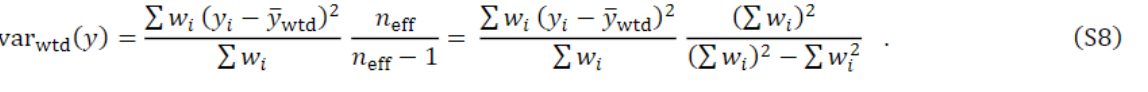

### Precip Mass+Area Weighted Mean

In [13]:
# Precip mass / are weighted for Snow samples
data = np.array([IB_01 , IB_02 , IB_03 , IB_04 , IB_05 , IB_06 , IB_07, IB_08, IB_09, IB_10])  # Isotope measurements
weights1 = np.array([168.586419, 260.923149, 224.600441, 322.325984, 832.765625, 624.480625, 875.439823, 615.160983, 773.38994,857.19467])  # Precipitation accumulation weights
weights2 = np.array([12.67, 72.09, 216.55, 256.55, 189.97, 116.28, 76.16, 53.81, 26.52, 8.91])  # Area weights

# Calculate combined weights
combined_weights = weights1 * weights2

# Calculate doubly-weighted mean
weighted_mean = np.average(data, weights=combined_weights)

# Calculate weighted variance
weighted_variance = (np.sum(combined_weights * (data - weighted_mean)**2) / np.sum(combined_weights)) * ((np.sum(combined_weights)**2)/((np.sum(combined_weights)**2)-np.sum(combined_weights**2)))
neff = (np.sum(combined_weights) ** 2) / np.sum(combined_weights**2)
standard_error = np.sqrt(weighted_variance / neff)

print("Weighted Mean:", weighted_mean)
print("Standard Error:", standard_error)

Weighted Mean: -19.816327106677555
Standard Error: 0.4143688839877681


In [14]:
# Precip mass / area weighted combined for Rain Samples
data = np.array([RC_01 , RC_02 , RC_03 , RC_04 , RC_05 , RC_06 , RC_07, RC_08, RC_09, RC_10])  # Isotope measurements
weights1 = np.array([334.32, 328.422199, 298.616493, 367.6122, 262.759259, 482.840065, 269.239056, 568.247197, 424.304921, 472.136001])  # Precipitation accumulation weights
weights2 = np.array([12.67, 72.09, 216.55, 256.55, 189.97, 116.28, 76.16, 53.81, 26.52, 8.91])  # Area weights

# Calculate combined weights
combined_weights = weights1 * weights2

# Calculate doubly-weighted mean
weighted_mean = np.average(data, weights=combined_weights)

# Calculate weighted variance
weighted_variance = (np.sum(combined_weights * (data - weighted_mean)**2) / np.sum(combined_weights)) * ((np.sum(combined_weights)**2)/((np.sum(combined_weights)**2)-np.sum(combined_weights**2)))
neff = (np.sum(combined_weights) ** 2) / np.sum(combined_weights**2)
standard_error = np.sqrt(weighted_variance / neff)

print("Weighted Mean:", weighted_mean)
print("Standard Error:", standard_error)

Weighted Mean: -12.82158709588768
Standard Error: 0.4957687350578647


## MC Site Area Contributions to total Watershed Area

In [15]:
#Percent(fraction) Area = Elevation_Area / Total Area 
Total_Area_MCW = 1029 #km2
farea_e1 = 19.19 / Total_Area_MCW
farea_e2 = 85.74 / Total_Area_MCW
farea_e3 = 240.31 / Total_Area_MCW
farea_e4 = 249.38 / Total_Area_MCW
farea_e5 = 174.54 / Total_Area_MCW
farea_e6 = 108.94 / Total_Area_MCW
farea_e7 = 70.72 / Total_Area_MCW
farea_e8 = 51.36 / Total_Area_MCW
farea_e9 = 22.23 / Total_Area_MCW
farea_e10 = 6.64 / Total_Area_MCW

In [16]:
fractional_areas = [
    19.19 / Total_Area_MCW,   # Event 1
    85.74 / Total_Area_MCW,   # Event 2
    240.31 / Total_Area_MCW,  # Event 3
    249.38 / Total_Area_MCW,  # Event 4
    174.54 / Total_Area_MCW,  # Event 5
    108.94 / Total_Area_MCW,  # Event 6
    70.72 / Total_Area_MCW,   # Event 7
    51.36 / Total_Area_MCW,   # Event 8
    22.23 / Total_Area_MCW,   # Event 9
    6.64 / Total_Area_MCW     # Event 10
]
# Calculate the cumulative sum of these areas
cumulative_areas = np.cumsum(fractional_areas)

# Find the point where cumulative sum exceeds or reaches 0.5 (50%)
halfway_index = np.where(cumulative_areas >= 0.5)[0][0]  # Get the first index where this condition is met

# Print out the results
print("The watershed reaches 50% of its area at site:", halfway_index + 1)  # +1 to adjust for zero-indexing
print("Cumulative area at this point:", cumulative_areas[halfway_index])

The watershed reaches 50% of its area at site: 4
Cumulative area at this point: 0.5778620019436347


In [17]:
# Elevation 1 % area * Weighted isotopes RC_01 + e+1 
Area_weighted_Rain = [(RC_01 * farea_e1) + (RC_02 * farea_e2) +
                      (RC_03 * farea_e3) + (RC_04 * farea_e4) + (RC_05 * farea_e5) +
                      (RC_06 * farea_e6) + (RC_07 * farea_e7) + (RC_08 * farea_e8)+
                      (RC_09 * farea_e9) + (RC_10 * farea_e10)]

Area_weighted_Snow = [(IB_01 * farea_e1) + (IB_02 * farea_e2) +
                      (IB_03 * farea_e3) + (IB_04 * farea_e4) + (IB_05 * farea_e5) +
                      (IB_06 * farea_e6) + (IB_07 * farea_e7) + (IB_08 * farea_e8)+
                      (IB_09 * farea_e9) + (IB_10 * farea_e10)]

print('Area Weighted Rain', Area_weighted_Rain)
print('Area Weighted Snow', Area_weighted_Snow)

Area Weighted Rain [-12.79868425259475]
Area Weighted Snow [-19.525825786705543]


### BC Area

In [18]:
# elevation area km^2
# Sum = 17.7 is this what proposal says? 
bc_area2 = 0.21
bc_area3 = 2.63
bc_area4 = 6.98
bc_area5 = 4.5
bc_area6 = 2.22
bc_area7 = 1.01
bc_area8 = 0.12

In [19]:
# Define the areas for each region
areas = np.array([0.21, 2.63, 6.98, 4.5, 2.22, 1.01, 0.12])

# Calculate the total area
total_area = areas.sum()

# Calculate the fractional areas for each region
fractional_areas = areas / total_area

# Calculate the cumulative sum of these fractional areas
cumulative_areas = np.cumsum(fractional_areas)

# Find the point where cumulative sum exceeds or reaches 0.5 (50%)
halfway_index = np.where(cumulative_areas >= 0.5)[0][0]  # Get the first index where this condition is met

# Print out the results
print("The region reaches 50% of its total area at index:", halfway_index + 2)  # +2 to match region naming (starting from bc_area2)
print("Cumulative area at this point:", cumulative_areas[halfway_index])

The region reaches 50% of its total area at index: 4
Cumulative area at this point: 0.5557441992076967


In [20]:
# BC Areas of the 2-8 elevations in square kilometers
bc_areas = [0.21, 2.63, 6.98, 4.5, 2.22, 1.01,0.12]

# Precipitation in each area in mm
bc_precipitations = [328.422199, 298.616493, 367.6122, 262.759259, 482.840065, 269.239056, 568.247197]

# First, we convert the precipitation to volume (since 1mm rainfall = 1m^3 of water per 1km^2)
#calculating precip volume for each elevation
bc_volumes = [area * precipitation for area, precipitation in zip(bc_areas, bc_precipitations)]

# Then, we sum up the volumes and divide by the total area to get the area-weighted precipitation
bc_total_area = sum(areas)
bc_total_precipitation = sum(bc_volumes) / bc_total_area  # No need to convert back to mm

print(f"The area-weighted total precipitation in BCRain is {bc_total_precipitation} mm.")

The area-weighted total precipitation in BCRain is 340.390827073005 mm.


In [21]:
# BC Areas of the 2-8 elevations in square kilometers
areas = [0.21, 2.63, 6.98, 4.5, 2.22, 1.01,0.12]

# Precipitation in each area in mm (IB 2-8)
precipitations = [260.923149, 224.600441, 322.325984, 832.765625, 624.480625, 875.439823, 615.160983]

# First, we convert the precipitation to volume (since 1mm rainfall = 1m^3 of water per 1km^2)
#calculating precip volume for each elevation
volumes = [area * precipitation for area, precipitation in zip(areas, precipitations)]

# Then, we sum up the volumes and divide by the total area to get the area-weighted precipitation
total_area = sum(areas)
total_precipitation = sum(volumes) / total_area  # No need to convert back to mm

print(f"The area-weighted total precipitation in BC snow is {total_precipitation} mm.")

The area-weighted total precipitation in BC snow is 508.6097469513299 mm.


### fraction 2

In [22]:
#Percent(fraction) Area = Elevation_Area / Total Area 
Total_Area_BCW = 17.1 #km2
fbc_area2 = 0.21 / Total_Area_BCW
fbc_area3 = 2.63 / Total_Area_BCW
fbc_area4 = 6.98 / Total_Area_BCW
fbc_area5 = 4.5 / Total_Area_BCW
fbc_area6 = 2.22 / Total_Area_BCW
fbc_area7 = 1.01 / Total_Area_BCW
fbc_area8 = 0.12 / Total_Area_BCW

In [23]:
# Elevation 1 % area * Weighted isotopes RC_01 + e+1 
Area_weighted_Rain = [(RC_02 * fbc_area2) + (RC_03 * fbc_area3) +
                      (RC_04 * fbc_area4) + (RC_05 * fbc_area5) +
                      (RC_06 * fbc_area6) + (RC_07 * fbc_area7) + (RC_08 * fbc_area8)]

Area_weighted_Snow = [(IB_02 * fbc_area2) + (IB_03 * fbc_area3) +
                      (IB_04 * fbc_area4) + (IB_05 * fbc_area5) +
                      (IB_06 * fbc_area6) + (IB_07 * fbc_area7) + (IB_08 * fbc_area8)]

print('BC Area Weighted Rain', Area_weighted_Rain)
print('BC Area Weighted Snow', Area_weighted_Snow)

BC Area Weighted Rain [-12.76064403976608]
BC Area Weighted Snow [-20.513157675438595]


In [24]:
#SE BC 
data = np.array([IB_02 , IB_03 , IB_04 , IB_05 , IB_06 , IB_07, IB_08])  # Isotope measurements
weights1 = np.array([260.923149, 224.600441, 322.325984, 832.765625, 624.480625, 875.439823, 615.160983])  # Precipitation accumulation weights
weights2 = np.array([0.21, 2.63, 6.98, 4.5, 2.22, 1.01,0.12])  # Area weights

# Calculate combined weights
combined_weights = weights1 * weights2

# Calculate doubly-weighted mean
weighted_mean = np.average(data, weights=combined_weights)

# Calculate weighted variance
weighted_variance = (np.sum(combined_weights * (data - weighted_mean)**2) / np.sum(combined_weights)) * ((np.sum(combined_weights)**2)/((np.sum(combined_weights)**2)-np.sum(combined_weights**2)))
neff = (np.sum(combined_weights) ** 2) / np.sum(combined_weights**2)
standard_error = np.sqrt(weighted_variance / neff)

print("Weighted Mean:", weighted_mean)
print("Standard Error Snow:", standard_error)

Weighted Mean: -20.123191626444804
Standard Error Snow: 0.4234131411094934


In [25]:
# SE BC Rain
data = np.array([RC_02 , RC_03 , RC_04 , RC_05 , RC_06 , RC_07, RC_08])  # Isotope measurements
weights1 = np.array([328.422199, 298.616493, 367.6122, 262.759259, 482.840065, 269.239056, 568.247197])  # Precipitation accumulation weights
weights2 = np.array([0.21, 2.63, 6.98, 4.5, 2.22, 1.01,0.12])  # Area weights

# Calculate combined weights
combined_weights = weights1 * weights2

# Calculate doubly-weighted mean
weighted_mean = np.average(data, weights=combined_weights)

# Calculate weighted variance
weighted_variance = (np.sum(combined_weights * (data - weighted_mean)**2) / np.sum(combined_weights)) * ((np.sum(combined_weights)**2)/((np.sum(combined_weights)**2)-np.sum(combined_weights**2)))
neff = (np.sum(combined_weights) ** 2) / np.sum(combined_weights**2)
standard_error = np.sqrt(weighted_variance / neff)

print("Weighted Mean:", weighted_mean)
print("Standard Error Rain:", standard_error)

Weighted Mean: -12.376250045286742
Standard Error Rain: 0.5636903093232445


In [26]:
# Mores Creek Area
sum = pd.read_csv('../Data/19.precip_accum_site_metrics.csv')
sum['area'] = [19.19,85.74,240.31,249.38,174.54,108.94,
                    70.72,51.36, 22.23,6.64]

total_area =  1029 #km2
sum['perc_area'] = sum['area'] / total_area

Total_Area_BCW = 17.1 #km2
sum['bc_area'] = [0,0.21, 2.63, 6.98, 4.5, 2.22, 1.01, .012,0,0]
sum['bc_perc_area'] = sum['bc_area'] / Total_Area_BCW
sum

,snow,rain,s_plus_rain,site,total,elevation,area,perc_area,bc_area,bc_perc_area
0,168.6,334.3,502.9,1,502.9,922,19.19,0.018649,0.000,0.000000
1,260.9,328.4,589.3,2,589.3,1160,85.74,0.083324,0.210,0.012281
2,224.6,298.6,523.2,3,523.2,1266,240.31,0.233537,2.630,0.153801
3,322.3,367.6,689.9,4,689.9,1455,249.38,0.242352,6.980,0.408187
4,832.8,262.8,1095.6,5,1095.5,1755,174.54,0.169621,4.500,0.263158
5,624.5,482.8,1107.3,6,1107.3,1780,108.94,0.105870,2.220,0.129825
6,875.4,269.2,1144.6,7,1144.7,1860,70.72,0.068727,1.010,0.059064
7,615.2,568.2,1183.4,8,1183.4,2036,51.36,0.049913,0.012,0.000702
8,773.4,424.3,1197.7,9,1197.7,2145,22.23,0.021603,0.000,0.000000
9,857.2,472.1,1329.3,10,1329.3,2316,6.64,0.006453,0.000,0.000000


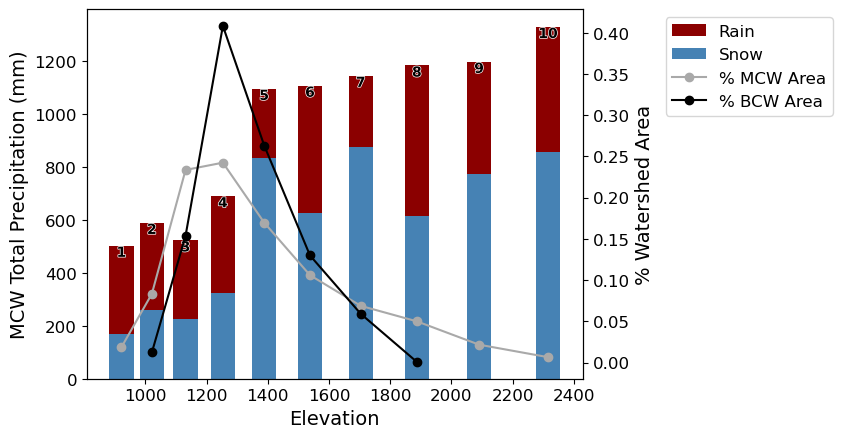

In [27]:
# Number of bars and colors
num_bars = len(sum.perc_area)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# Generate geometrically spaced elevation values
elevation_values = np.geomspace(sum['elevation'].min(), sum['elevation'].max(), num_bars)

# Calculate the width of each bar
bar_width = (elevation_values[1] - elevation_values[0]) * 0.8  # Adjust the multiplier as needed

# Initialize bottom values for stacking
bottom_values_snow = np.zeros_like(elevation_values)
bottom_values_rain = np.zeros_like(elevation_values)

# Lists to store legend handles and labels
handles_rain_snow = []

# Plot stacked bars with different colors for rain and snow
for i, elevation in enumerate(elevation_values):
    bar_rain = plt.bar(elevation, sum['s_plus_rain'].iloc[i], width=bar_width, color='darkred', label='Rain' if i == 0 else None, bottom=bottom_values_rain[i])
    bar_snow = plt.bar(elevation, sum['snow'].iloc[i], width=bar_width, color='steelblue', label='Snow' if i == 0 else None, bottom=bottom_values_snow[i])

    # Update bottom values for the next iteration
    bottom_values_rain[i] += sum['s_plus_rain'].iloc[i]
    bottom_values_snow[i] += sum['snow'].iloc[i]
    
    # Append the legend handles for rain and snow
    if i == 0:
        handles_rain_snow.extend([bar_rain, bar_snow])
    
for i, elevation in enumerate(elevation_values):
    # Height of the bar
    height_rain = sum['s_plus_rain'].iloc[i]
    # Add labels inside the bars
    text = plt.text(elevation- .2, height_rain -1, str(i+1), va='top', ha='center',color='black', fontsize=10, fontweight='bold')
    text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])
    
plt.ylabel('MCW Total Precipitation (mm)', fontsize=14)
plt.xlabel('Elevation',fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Create a secondary y-axis for % watershed area
ax2 = plt.gca().twinx()
line_perc_area = ax2.plot(elevation_values, sum.perc_area, color='darkgray', marker='o', linestyle='-')

#bannock Creek: remove dots for area with zero elevation contribution
bc_perc = np.array(sum.bc_perc_area)
elevs = np.array(elevation_values)

# Filter out zero values
mask = bc_perc != 0
lpa = ax2.plot(elevs[mask], bc_perc[mask], color='black', marker='o', linestyle='-')
ax2.set_ylabel('% Watershed Area',fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
# Combine legends
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend(handles_rain_snow + line_perc_area + lpa)
labels.extend(["Rain", "Snow"] + ["% MCW Area"] + ['% BCW Area'])
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1),fontsize=12)

# 2. Sine Curve amount-weighted, annual precipitation δ18O values

### MCW Sine Curve Fitting

In [28]:
# Summer Peak and Winter Trough Values: Sine Curve Fitting
c1 = -19.15
w1= -7.60

c2= -19.16
w2= -8.07

c3= -19.79
w3= -8.05

c4= -19.76
w4= -8.52

c5= -20.57
w5= -9.23

c6= -19.61
w6= -9.85

c7= -20.79
w7= -9.47

c8= -19.10
w8= -11.72

c9= -19.18
w9= -12.33

c10= -19.63
w10= -12.70

In [29]:
# Precip accum for Cold vs Warm: Sine Curve fitting 
#recalculated using WRF 5/13/2024
pc1 = 404.83
pw1 = 97.82
one_totalP = 502.65

pc2 = 488.64 
pw2 = 100.7
two_totalP = 589.34

pc3 = 440.67
pw3 = 82.55
three_totalP = 523.22

pc4 = 526.94
pw4 = 119.31
four_totalP = 646.25

pc5 = 769.03
pw5 = 145.65
five_totalP = 914.68

pc6 = 890.18
pw6 = 163.52
six_totalP = 1053.7

pc7 = 984.61
pw7 = 104.22
seven_totalP = 1088.83

pc8 = 956.78
pw8 = 162.12
eight_totalP = 1118.89

pc9 = 994.11
pw9 = 203.58
nine_totalP = 1197.69

pc10 = 1009.54
pw10 = 319.79
ten_totalP = 1329.33

Sum_w_P = pw1 + pw2 + pw3 + pw4 + pw5 + pw6 + pw7 + pw8 + pw9 + pw10
Sum_c_P = pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8 + pc9 + pc10

In [30]:
#equation for samples these are mass weighted by season instead of by individual precip event 
#Testing multiple ways to get weight: 1. divide by the total sums 2. dividing by the average precipiation 
1. 
# (RC_01 sample D18O * RC_01 precip accum event) / total RC_01 event
warm_sine = ((w1 * pw1) + (w2 * pw2) + (w3 * pw3) + (w4 * pw4) + (w5 * pw5) + (w6 * pw6) + (w7 * pw7) + (w8 * pw8) + (w9 * pw9) + (w10 * pw10)) / (Sum_w_P)
print('Sine Mass Weight Warm', warm_sine)

cold_sine = ((c1 * pc1) + (c2 * pc2) + (c3 * pc3) + (c4 * pc4) + (c5 * pc5) + (c6 * pc6) + (c1 * pc7) + (c8 * pc8) + (c9 * pc9) + (c10 * pc10)) / (Sum_c_P)
print('Sine Mass Weight cold', cold_sine)

Sine Mass Weight Warm -10.438906794018383
Sine Mass Weight cold -19.495117697409228


In [31]:
2.
#SE for AM7 weighted Sine for warm season PRECIP
#AM7 weighted seasons only convert standard error from sine curve to a percet. 
y = np.array([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10])  # isotopic measurements
w = np.array([pw1, pw2, pw3, pw4, pw5,pw6,pw7, pw8, pw9, pw10])  # weights (precip accum)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Warm Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm SE Weighted Mean:", se_yw_c)
print('higher unercertainty b/c of uneven weight distribution, one of the weights holds all of the power')

Warm Weighted Mean: -10.438906794018383
Warm Weighted Variance: 3.9867575185988877
Warm neff: 8.33850115258314
Warm SE Weighted Mean: 0.6914581731187124
higher unercertainty b/c of uneven weight distribution, one of the weights holds all of the power


In [32]:
#SE for AM7 weighted Sine for cold season PRECIP
#AM7 weighted seasons only convert standard error from sine curve to a percet. 
y = np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10])  # isotopic measurements
w = np.array([pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10])  # weights (precip accum)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Cold Weighted Mean: -19.711418972771465
Cold Weighted Variance: 0.398519431210903
Cold neff: 9.06101784279651
Cold SE Weighted Mean: 0.2097182659448261


In [33]:
# Elevation 1 % area 
#Area weighted not mass weighted 
Area_weighted_SineWarm = [(w1 * farea_e1) + (w2 * farea_e2) +
                      (w3 * farea_e3) + (w4 * farea_e4) + (w5 * farea_e5) +
                      (w6 * farea_e6) + (w7 * farea_e7) + (w8 * farea_e8)+
                      (w9 * farea_e9) + (w10 * farea_e10)]

Area_weighted_SineCold = [(c1 * farea_e1) + (c2 * farea_e2) +
                      (c3 * farea_e3) + (c4 * farea_e4) + (c5 * farea_e5) +
                      (c6 * farea_e6) + (c7 * farea_e7) + (c8 * farea_e8)+
                      (c9 * farea_e9) + (c10 * farea_e10)]

print('Area Weighted Sine Warm', Area_weighted_SineWarm)
print('Area Weighted Sine Cold', Area_weighted_SineCold)

Area Weighted Sine Warm [-8.95152925170068]
Area Weighted Sine Cold [-19.85258620019436]


In [34]:
# SE for AM8 weighted Sine for warm season PRECIP 
# weights are the same for both seasons
y = np.array([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10])  # isotopic measurements
w = np.array([farea_e1, farea_e2, farea_e3, farea_e4,
              farea_e5, farea_e6,farea_e7,
              farea_e8, farea_e9, farea_e10])  # weights (elevation area fraction)

# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Warm Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm SE Weighted Mean:", se_yw_c)
print("all the weight is in RC_01")

Warm Weighted Mean: -8.951094310286187
Warm Weighted Variance: 1.407387351169056
Warm neff: 5.943498431368458
Warm SE Weighted Mean: 0.4866152840750358
all the weight is in RC_01


In [35]:
#SE for AM8 weighted Sine for cold season PRECIP 
y = np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10])  # isotopic measurements
w = np.array([farea_e1, farea_e2, farea_e3, farea_e4,
              farea_e5, farea_e6,farea_e7,
              farea_e8, farea_e9, farea_e10])  # weights (elevation area fraction)
# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)

# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))

# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)

# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Cold Weighted Mean: -19.851621592731163
Cold Weighted Variance: 0.2938872488650235
Cold neff: 5.943498431368458
Cold SE Weighted Mean: 0.22236646674710683


# Bannock Creek Sine Curve Fitting

In [36]:
#BC Sum Warm Season Precip
BC_Sum_w_P =  pw2 + pw3 + pw4 + pw5 + pw6 + pw7 + pw8 
# BC Sum Cold Season Precip
BC_Sum_c_P = pc2 + pc3 + pc4 + pc5 + pc6 + pc7 + pc8

#equation for samples
# (RC_01 sample D18O * RC_01 precip accum event) / total RC_01 event
BCwarm_sine = ((w2 * pw2) + (w3 * pw3) + (w4 * pw4) + (w5 * pw5) + (w6 * pw6) + (w7 * pw7) + (w8 * pw8)) / (BC_Sum_w_P)
print('BC Mass Weight Warm', BCwarm_sine)

BCcold_sine = ((c2 * pc2) + (c3 * pc3) + (c4 * pc4) + (c5 * pc5) + (c6 * pc6) + (c1 * pc7) + (c8 * pc8)) / (BC_Sum_c_P)
print('BC Mass Weight cold', BCcold_sine)

BC Mass Weight Warm -9.493239718929013
BC Mass Weight cold -19.557766692703954


In [37]:
# Elevation 1 % area * Weighted isotopes RC_01 + e+1 
#Area weighted not mass weighted 
BCArea_weighted_SineWarm = [(w2 * farea_e2) +
                      (w3 * farea_e3) + (w4 * farea_e4) + (w5 * farea_e5) +
                      (w6 * farea_e6) + (w7 * farea_e7) + (w8 * farea_e8)]

BCArea_weighted_SineCold = [(c2 * farea_e2) +
                      (c3 * farea_e3) + (c4 * farea_e4) + (c5 * farea_e5) +
                      (c6 * farea_e6) + (c7 * farea_e7) + (c8 * farea_e8)]

print('BC Area Weighted Sine Warm', BCArea_weighted_SineWarm)
print('BC Area Weighted Sine Cold', BCArea_weighted_SineCold)

BC Area Weighted Sine Warm [-8.461472983479105]
BC Area Weighted Sine Cold [-18.9544296404276]


In [38]:
#BC6 Sine
#SE for AM weighted Sine for warm season PRECIP
#weighted seasons only convert standard error from sine curve to a percet. 
y = np.array([w2,w3,w4,w5,w6,w7,w8])  # isotopic measurements
w = np.array([pw2, pw3, pw4, pw5,pw6,pw7, pw8])  # weights (precip accum)
# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)
# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))
# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)
# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Warm Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm SE Weighted Mean:", se_yw_c)
print('higher unercertainty b/c of uneven weight distribution, one of the weights holds all of the power')

Warm Weighted Mean: -9.493239718929013
Warm Weighted Variance: 1.775350218948969
Warm neff: 6.630191164417794
Warm SE Weighted Mean: 0.5174626328223519
higher unercertainty b/c of uneven weight distribution, one of the weights holds all of the power


In [39]:
#SE for BC AM6 weighted Sine for cold season PRECIP
# weighted seasons only convert standard error from sine curve to a percet. 
y = np.array([c2,c3,c4,c5,c6,c7,c8])  # isotopic measurements
w = np.array([pc2,pc3,pc4,pc5,pc6,pc7,pc8])  # weights (precip accum)
# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)
# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))
# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)
# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)

print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Cold Weighted Mean: -19.8770880884345
Cold Weighted Variance: 0.49015214337896035
Cold neff: 6.4261283419961055
Cold SE Weighted Mean: 0.27617906536377346


In [40]:
#BC
#SE for AM7 weighted Sine for warm season PRECIP 
#the weights are the same for both seasons
y = np.array([w2,w3,w4,w5,w6,w7,w8])  # isotopic measurements
w = np.array([farea_e2, farea_e3, farea_e4,
              farea_e5, farea_e6,farea_e7,
              farea_e8])  # weights (elevation area fraction)
# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)
# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))
# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)
# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)
print("Warm Area Weighted Mean:", yw)
print("Warm Weighted Variance:", var_w)
print("Warm neff:", n_eff)
print("Warm Area SE Weighted Mean:", se_yw_c)

#SE for AM7 weighted Sine for cold season PRECIP 
y = np.array([c2,c3,c4,c5,c6,c7,c8])  # isotopic measurements
w = np.array([farea_e2, farea_e3, farea_e4,
              farea_e5, farea_e6,farea_e7,
              farea_e8])  # weights (elevation area fraction)
# Calculate weighted average
# eq 4
yw = np.sum(w * y) / np.sum(w)
# Calculate weighted variance
# eq 8
var_w = (np.sum(w * (y - yw) ** 2) / np.sum(w)) * ((np.sum(w)**2)/ ((np.sum(w)**2)-np.sum(w**2)))
# Calculate effective sample size
# eq 6
n_eff = (np.sum(w) ** 2) / np.sum(w ** 2)
# Calculate standard error of the weighted mean
# eq 5
se_yw_c = np.sqrt(var_w / n_eff)
print("Cold Weighted Mean:", yw)
print("Cold Weighted Variance:", var_w)
print("Cold neff:", n_eff)
print("Cold SE Weighted Mean:", se_yw_c)

Warm Area Weighted Mean: -8.875580485020235
Warm Weighted Variance: 1.0206932769682509
Warm neff: 5.428923023925101
Warm Area SE Weighted Mean: 0.4336015092109074
Cold Weighted Mean: -19.88206617804463
Cold Weighted Variance: 0.2884342129153437
Cold neff: 5.428923023925101
Cold SE Weighted Mean: 0.23049767270229732


# 3. Mores Creek Weighted Stream Samples
To calculate seasonal volume-weighted averages of δ18O and δ2H in streamflow, weight each streamflow isotope value by the cumulative streamflow since the previous sample. Kirchner & Allen (2020)

In [41]:
df = read_mcw.read_and_process()
mc = pd.read_csv('../Data/18.MoresCreek_USGS_Gage.csv',parse_dates = [0])
df.head(5)

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,D_18O_Snow,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,NaN,NaN,-16.459499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,NaN,-16.055768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,NaN,NaN,-16.515137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,NaN,-15.892233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,NaN,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701


In [42]:
# Filter df for each type
df['MC_Sampling'] = df[df['Type'] == 'MC'][['Collection_Date']]
df_BC = df[df['Type'] == 'BC'][['Collection_Date']]
new_df = df[['MC_Sampling', 'D_18O_MC']].copy()

In [43]:
mc_weight = pd.read_csv('../Data/13.morescreekmassweighting.csv',parse_dates = [0])

In [44]:
# Adding MC_Sampling to both dataframes
mc_weight['MC_Sampling'] = pd.to_datetime(mc_weight['MC_Sampling'], errors='coerce', format='%m/%d/%Y')
new_df['MC_Sampling'] = pd.to_datetime(new_df['MC_Sampling'], errors='coerce')

In [45]:
# Merging mc_weight with new_df
merged_df= pd.merge(mc_weight, new_df, on='MC_Sampling', how='left')
merged_df = merged_df.drop_duplicates(subset='datetime', keep='first')
merged_df.head(5)

,datetime,MC_Sampling,MC_Q_event,Mean_Discharge_ft3_sec,D_18O_MC
0,2022-10-01,NaT,NaN,23.3,NaN
176,2022-10-02,NaT,NaN,24.6,NaN
352,2022-10-03,NaT,NaN,24.6,NaN
528,2022-10-04,NaT,NaN,24.8,NaN
704,2022-10-05,2022-10-05,122.4,25.1,-16.055768


In [46]:
MC_massweight = (merged_df['D_18O_MC'] * merged_df['MC_Q_event']).sum() / (merged_df['MC_Q_event']).sum()
print('MC Mass Weighted Average Stream Sample: ', MC_massweight)

MC Mass Weighted Average Stream Sample:  -17.04330186638911


# MC2 Stream
MC1 and MC2 are same

In [47]:
merged_df['Cold7_avg'] = np.where((merged_df['MC_Sampling'] >= '2022-10-29') &
                        (merged_df['MC_Sampling'] < '2023-05-01'), merged_df['D_18O_MC'], np.nan) 
merged_df['Warm7_avg'] = np.where((merged_df['MC_Sampling']  < '2022-10-29') |
                        (merged_df['MC_Sampling']  >= '2023-05-01'),merged_df['D_18O_MC'], np.nan)

merged_df['event_Cold7_avg'] = np.where((merged_df['MC_Sampling'] >= '2022-10-29') &
                        (merged_df['MC_Sampling'] < '2023-05-01'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Warm7_avg'] = np.where((merged_df['MC_Sampling']  < '2022-10-29') |
                        (merged_df['MC_Sampling']  >= '2023-05-01'),merged_df['MC_Q_event'], np.nan)

MC_AM2Cold = (merged_df['Cold7_avg'] * merged_df['event_Cold7_avg']).sum() / (merged_df['event_Cold7_avg']).sum()
print('weighted cold stream am1',MC_AM2Cold)

MC_AM2Warm = (merged_df['Warm7_avg'] * merged_df['event_Warm7_avg']).sum() / (merged_df['event_Warm7_avg']).sum()
print('weighted warm stream am1',MC_AM2Warm)

print('non weighted cold stream', merged_df['Cold7_avg'].mean())
print('non weighted warm stream', merged_df['Warm7_avg'].mean())

weighted cold stream am1 -16.71631607459403
weighted warm stream am1 -17.169395791154333
non weighted cold stream -16.558256454545454
non weighted warm stream -16.39460142857143


# MC3 Stream

In [48]:
# AM3 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17
merged_df['wrf_Cold7'] = np.where((merged_df['MC_Sampling'] >= '2022-11-10') &
                        (merged_df['MC_Sampling'] < '2023-03-17'), merged_df['D_18O_MC'], np.nan) 
merged_df['wrf_Warm7'] = np.where((merged_df['MC_Sampling']  < '2022-11-10') |
                        (merged_df['MC_Sampling']  >= '2023-03-17'),merged_df['D_18O_MC'], np.nan)

merged_df['event_Cold7_wrf'] = np.where((merged_df['MC_Sampling'] >= '2022-11-10') &
                        (merged_df['MC_Sampling'] < '2023-03-17'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Warm7_wrf'] = np.where((merged_df['MC_Sampling']  < '2022-11-10') |
                        (merged_df['MC_Sampling']  >= '2023-03-17'),merged_df['MC_Q_event'], np.nan)

MC_AM3Cold = (merged_df['wrf_Cold7'] * merged_df['event_Cold7_wrf']).sum() / (merged_df['event_Cold7_wrf']).sum()
print('weighted cold stream am1',MC_AM3Cold)

MC_AM3Warm = (merged_df['wrf_Warm7'] * merged_df['event_Warm7_wrf']).sum() / (merged_df['event_Warm7_wrf']).sum()
print('weighted warm stream am1',MC_AM3Warm)

print('non weighted cold stream', merged_df['wrf_Cold7'].mean())
print('non weighted warm stream', merged_df['wrf_Warm7'].mean())

weighted cold stream am1 -16.46897555284175
weighted warm stream am1 -17.143770018409764
non weighted cold stream -16.46600077777778
non weighted warm stream -16.466952125


# MC4 Stream

In [49]:
# AM4 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17
merged_df['wrf_Cold'] = np.where((merged_df['MC_Sampling'] >= '2022-11-11') &
                        (merged_df['MC_Sampling'] < '2023-04-09'), merged_df['D_18O_MC'], np.nan) 
merged_df['wrf_Warm'] = np.where((merged_df['MC_Sampling']  < '2022-11-11') |
                        (merged_df['MC_Sampling']  >= '2023-04-09'),merged_df['D_18O_MC'], np.nan)

merged_df['event_Cold_wrf'] = np.where((merged_df['MC_Sampling'] >= '2022-11-11') &
                        (merged_df['MC_Sampling'] < '2023-04-09'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Warm_wrf'] = np.where((merged_df['MC_Sampling']  < '2022-11-11') |
                        (merged_df['MC_Sampling']  >= '2023-04-09'),merged_df['MC_Q_event'], np.nan)

MC_AM4Cold = (merged_df['wrf_Cold'] * merged_df['event_Cold_wrf']).sum() / (merged_df['event_Cold_wrf']).sum()
print('weighted cold stream am4',MC_AM4Cold)

MC_AM4Warm = (merged_df['wrf_Warm'] * merged_df['event_Warm_wrf']).sum() / (merged_df['event_Warm_wrf']).sum()
print('weighted warm stream am4',MC_AM4Warm)

print('non weighted cold stream', merged_df['wrf_Cold'].mean())
print('non weighted warm stream', merged_df['wrf_Warm'].mean())

weighted cold stream am4 -16.564465684801238
weighted warm stream am4 -17.163026741886426
non weighted cold stream -16.5036511
non weighted warm stream -16.441915333333334


# MC5 Stream
## Weighted rain vs snow (Mass & Elevation)

In [50]:
# AM5
# this should be a 50% ratio of when all sites are collected for rain and snow- 
#need to take a look at field instrumentation installation or when samples where anallyzed
# Winter Start = 2022-12-18
# Summer Start = 2023-05-16 

# MC6 - MC8 Stream

In [51]:
#Sine curve fitting - Site 4 @ 50% of watershed area 
# Winter Start = 2023-10-26
# Summer Start =  2023-05-29
#Corrected on May 13th 2023

merged_df['sine_stream_Warm'] = np.where((merged_df['MC_Sampling'] >= '2023-05-29') &
                        (merged_df['MC_Sampling'] < '2023-10-26')
                                         | (merged_df['MC_Sampling'] < '2022-10-26'), merged_df['D_18O_MC'], np.nan) 
merged_df['sine_stream_Cold'] = np.where((merged_df['MC_Sampling']  >= '2022-10-26') &
                        (merged_df['MC_Sampling']  < '2023-05-29'),merged_df['D_18O_MC'], np.nan)

merged_df['event_Warm_sine'] = np.where((merged_df['MC_Sampling'] >= '2023-05-29') &
                        (merged_df['MC_Sampling'] < '2023-10-26')
                                         | (merged_df['MC_Sampling'] < '2022-10-26'), merged_df['MC_Q_event'], np.nan) 
merged_df['event_Cold_sine'] = np.where((merged_df['MC_Sampling']  >= '2022-10-26') &
                        (merged_df['MC_Sampling']  < '2023-05-29'),merged_df['MC_Q_event'], np.nan)

MC_AM6Cold = (merged_df['sine_stream_Cold'] * merged_df['event_Cold_sine']).sum() / (merged_df['event_Cold_sine']).sum()
print('weighted cold stream am6',MC_AM6Cold)

MC_AM6Warm = (merged_df['sine_stream_Warm'] * merged_df['event_Warm_sine']).sum() / (merged_df['event_Warm_sine']).sum()
print('weighted warm stream am6',MC_AM6Warm)

print('non weighted cold stream', merged_df['sine_stream_Cold'].mean())
print('non weighted warm stream', merged_df['sine_stream_Warm'].mean())

weighted cold stream am6 -17.1273861005571
weighted warm stream am6 -16.906525800555034
non weighted cold stream -16.636930785714288
non weighted warm stream -16.2714924
